In [1]:
import pandas as pd
from pprint import pprint
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


In [2]:


dirs = ['R1398','R1399','R1400','R1401','U1398','U1399','U1400','U1401']

dir = dirs[4]
total_df=pd.read_csv(f'../{dir}/clus_data/{dir}_total.csv')
def f(col1,col2):
    return col1/col2

# total_df['total_income']=total_df.apply(lambda x :f(x.total_income,x.member),axis=1)
# total_df['total_cost']=total_df.apply(lambda x :f(x.total_cost,x.member),axis=1)

# total_df['total_income']=total_df['total_income']/1000000
# total_df['total_cost']=total_df['total_cost']/1000000
# total_df['total']=total_df.iloc[:,1:].sum(axis=1)


# total_df['total_income'] = np.log2(total_df['total_income'])
# total_df['total_cost'] = np.log2(total_df['total_cost'])


# total_df=total_df.iloc[:, [1, 3]]
total_df=total_df.iloc[:,1:]
total_df[total_df.isnull().any(axis=1)]
total_df_corr =total_df
total_df=total_df[['member','Male_count','Female_count','age','literacy','vehicle','motorcycle','facilities','total_cost','total_income']]

In [3]:
total_df.columns


Index(['member', 'Male_count', 'Female_count', 'age', 'literacy', 'vehicle',
       'motorcycle', 'facilities', 'total_cost', 'total_income'],
      dtype='object')

**Robust scaler**

In [4]:
from sklearn.preprocessing import RobustScaler

rbs_data_scaled = RobustScaler(with_centering = True, with_scaling = True).fit_transform(total_df)



**elbow rbs**

within cluster sum of squared distance for k=2:  193449.5981062464
within cluster sum of squared distance for k=3:  167607.34197202668
within cluster sum of squared distance for k=4:  128063.56691110143
within cluster sum of squared distance for k=5:  116797.84114711362
within cluster sum of squared distance for k=6:  108285.44943987326
within cluster sum of squared distance for k=7:  89765.05731256667
within cluster sum of squared distance for k=8:  81560.6790253107
within cluster sum of squared distance for k=9:  76841.60077399589
within cluster sum of squared distance for k=10:  73520.89813800166
within cluster sum of squared distance for k=11:  68301.25611660267
within cluster sum of squared distance for k=12:  65800.70249607836
within cluster sum of squared distance for k=13:  63525.33793519318
within cluster sum of squared distance for k=14:  61087.19425779871
within cluster sum of squared distance for k=15:  59203.080332839476
within cluster sum of squared distance for k=16:  57

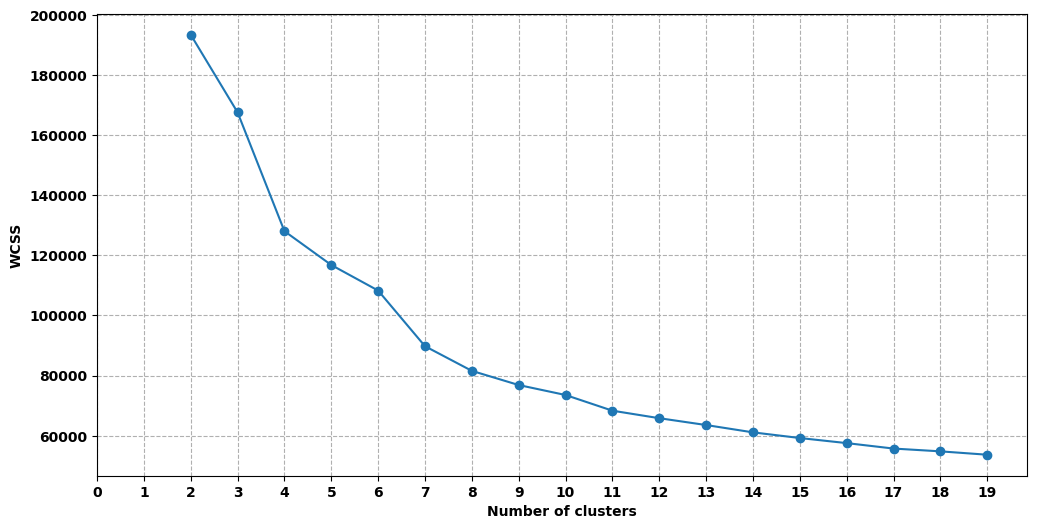

In [5]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(rbs_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette rbs**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


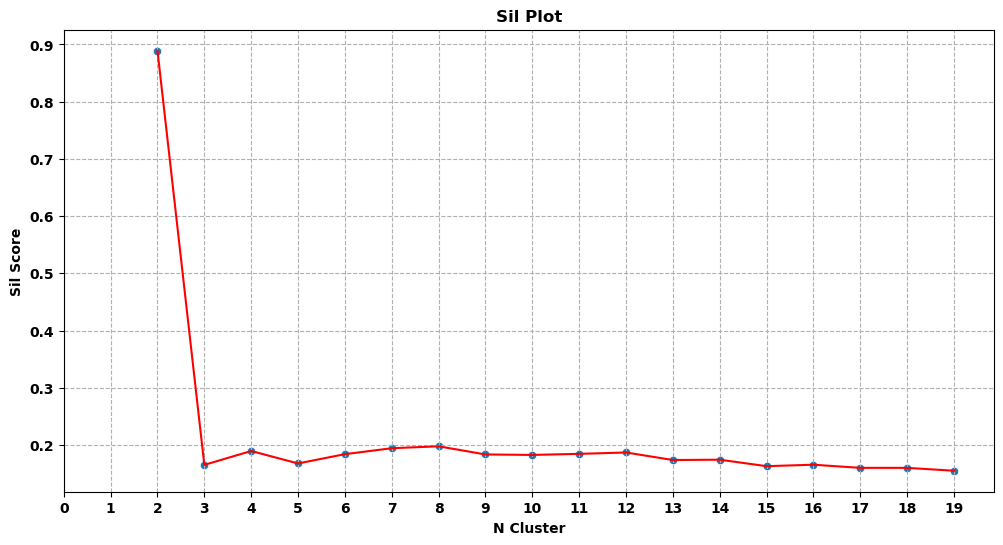

In [6]:
from sklearn.metrics import silhouette_score
df =rbs_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

**PCA rbs**

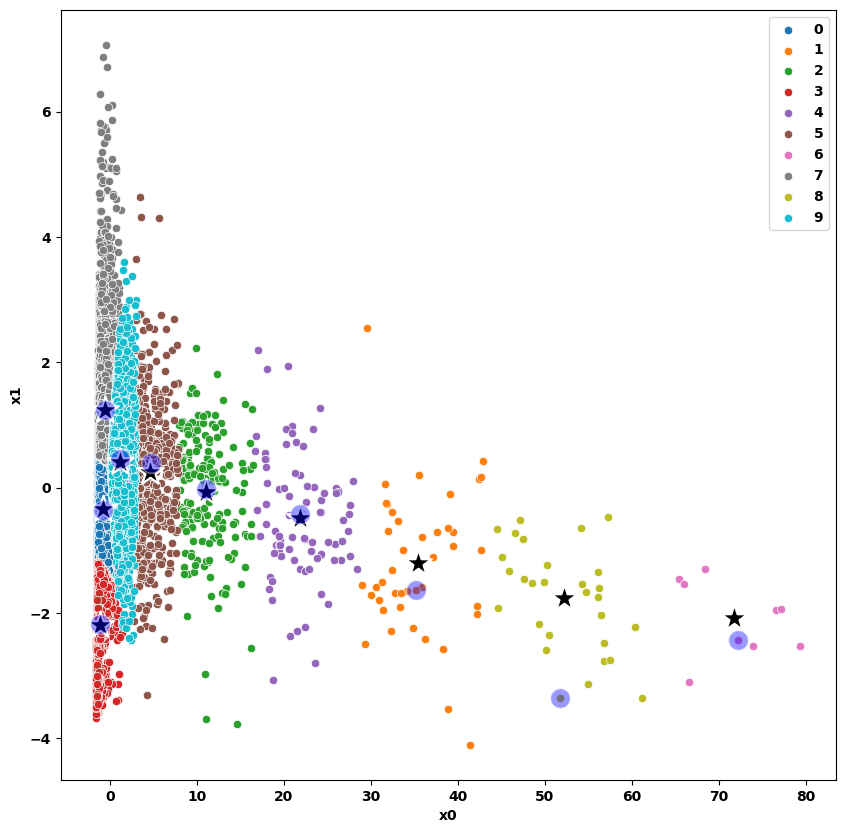

In [7]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(rbs_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**L2 norm**

In [8]:
l2_data_scaled = preprocessing.normalize(total_df, norm='l2')
l2_data_scaled = pd.DataFrame(l2_data_scaled, columns = total_df.columns)

**elbow l2**

within cluster sum of squared distance for k=2:  800.6555266607527
within cluster sum of squared distance for k=3:  362.9393252005211
within cluster sum of squared distance for k=4:  212.98650014841198
within cluster sum of squared distance for k=5:  144.83946865081464
within cluster sum of squared distance for k=6:  106.41999495459942
within cluster sum of squared distance for k=7:  82.27370719511471
within cluster sum of squared distance for k=8:  66.38059027259617
within cluster sum of squared distance for k=9:  54.20665434104612
within cluster sum of squared distance for k=10:  46.727630807725546
within cluster sum of squared distance for k=11:  36.27415235673696
within cluster sum of squared distance for k=12:  30.103320765689908
within cluster sum of squared distance for k=13:  25.917556437116815
within cluster sum of squared distance for k=14:  22.541100382201343
within cluster sum of squared distance for k=15:  19.340401586928216
within cluster sum of squared distance for k=16:

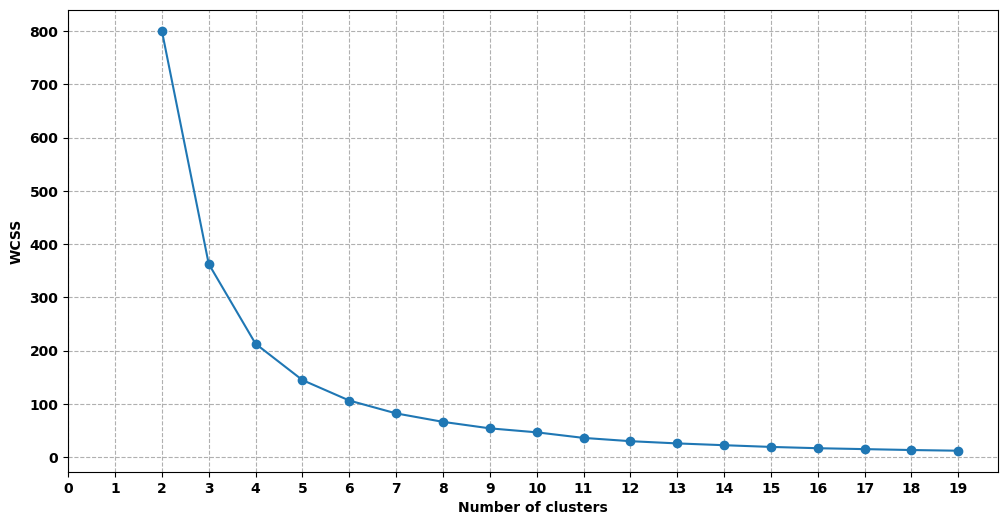

In [9]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(l2_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette l2**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


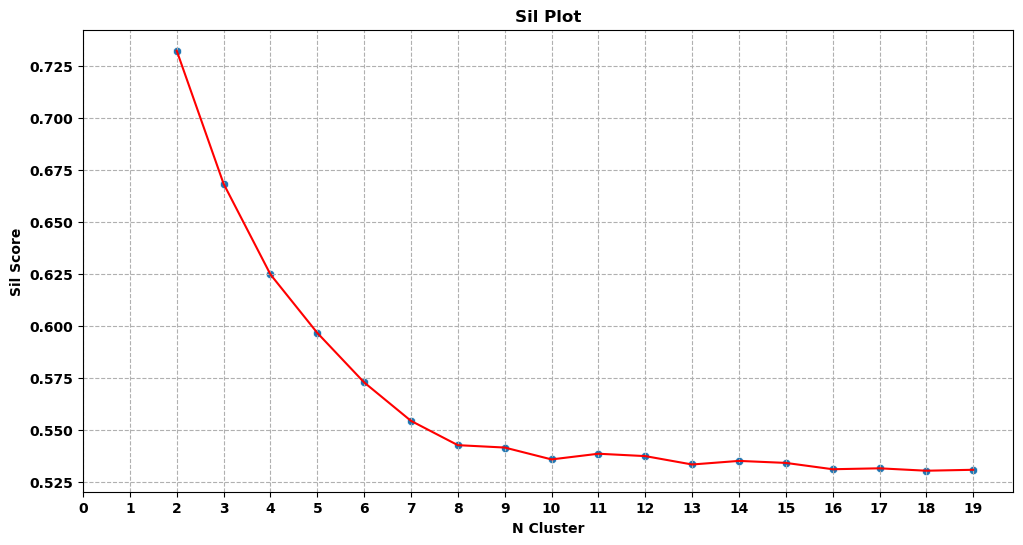

In [10]:
from sklearn.metrics import silhouette_score
df =l2_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

<p dir=rtl style="direction: rtl;text-align justify;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=3>
این جا براساس شکستگی sil و elbow  و در رسم نمودار بعدی از آن استفاده می کنیم مقادیر 5 یا 6 مناسب است که ما مقدار 6 رو انتخاب میکنیم
</p>

**Pca l2**

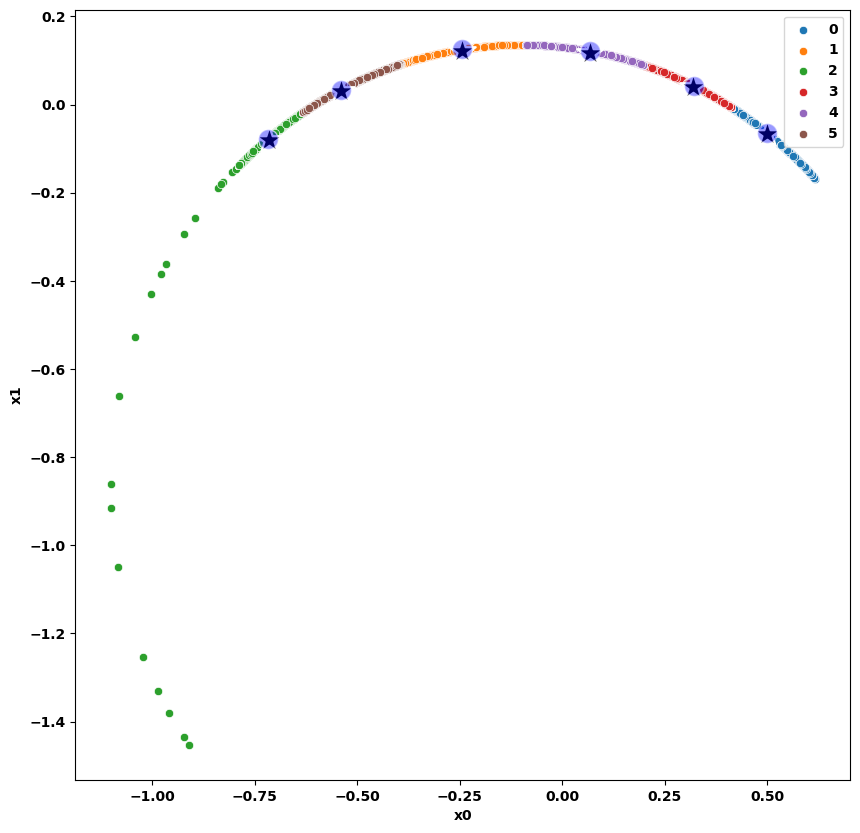

In [11]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(l2_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 6,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**center l2**

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++").fit(l2_data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, l2_data_scaled)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_10192\870627896.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([ 8850,  9699, 12237,  7513, 17793,  7810], dtype=int64)

C:\Users\theki\AppData\Local\Temp\ipykernel_10192\4228730169.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


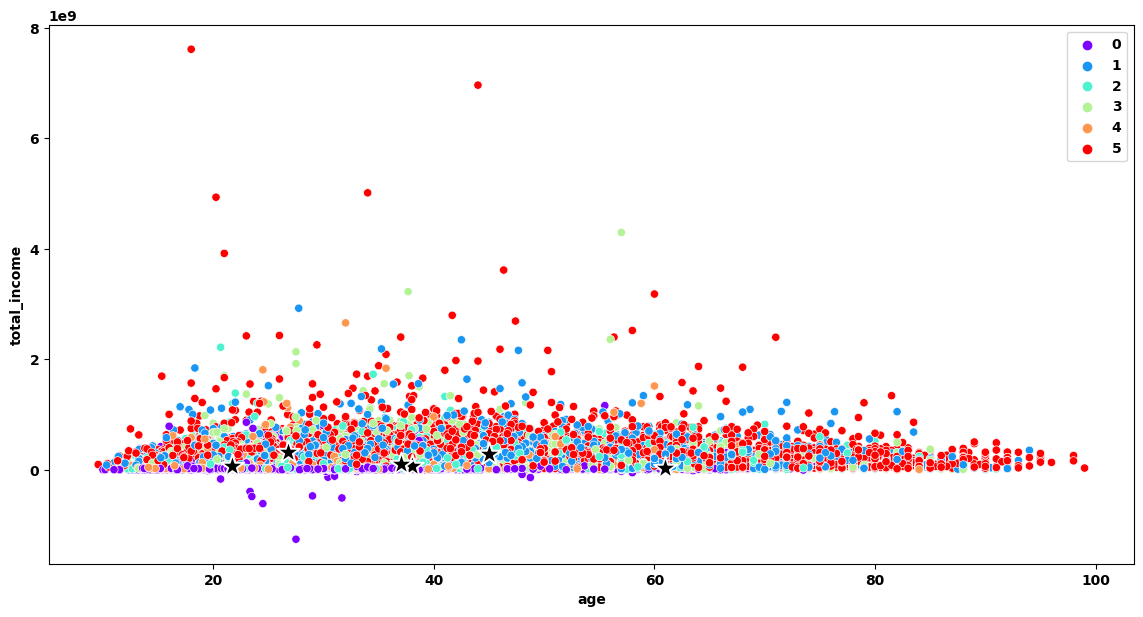

In [13]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++").fit(l2_data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, l2_data_scaled)


col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**center l2 visualize**

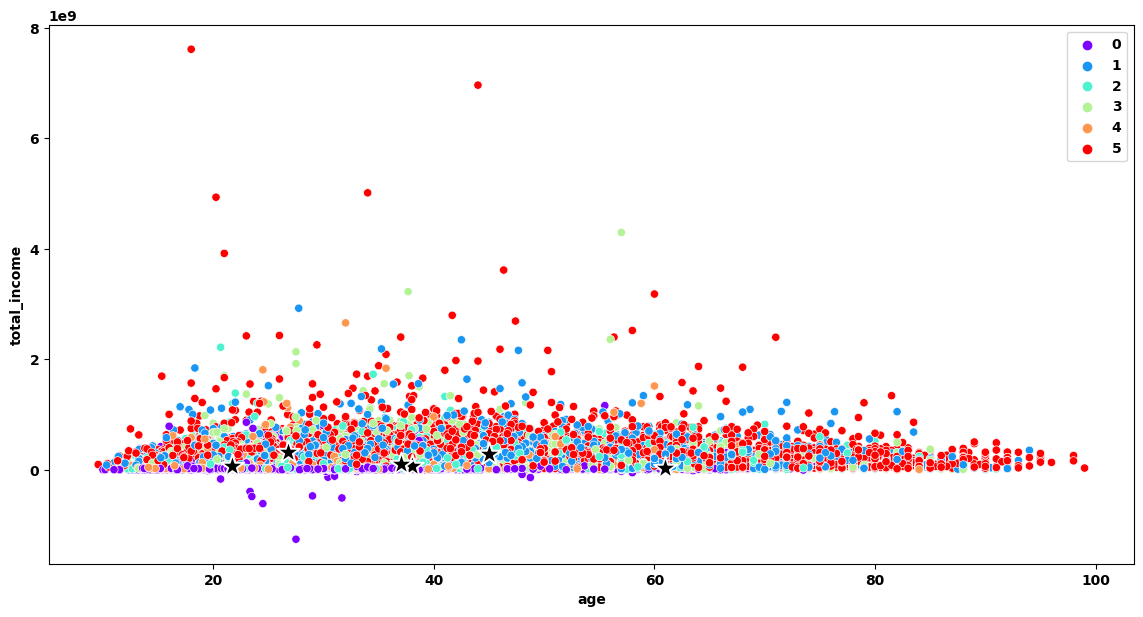

In [14]:
col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**center l2 points**

In [15]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
18080,4,2,2,26.750000,0.500000,1,0,9,844882000.0,314480000.0,4
17374,3,1,2,45.000000,1.000000,1,0,8,190312000.0,290000000.0,3
14020,1,0,1,37.000000,1.000000,0,0,3,17124638.0,105460000.0,5
17505,3,1,2,21.666667,0.666667,0,0,9,26471000.0,72920000.0,1
16391,3,2,1,38.000000,0.666667,1,0,6,87639100.0,71760000.0,2
19227,2,1,1,61.000000,0.000000,0,1,7,303028000.0,32420000.0,0


**MaxAbs scaler**

In [16]:
scaler = MaxAbsScaler()
data_scaled =scaler.fit_transform(total_df)
data_scaled = pd.DataFrame(data_scaled, columns = total_df.columns)


**min_max scaler**

In [17]:
minmax_scaler = MinMaxScaler()
minmax_data_scaled =minmax_scaler.fit_transform(total_df)
minmax_data_scaled = pd.DataFrame(minmax_data_scaled, columns = total_df.columns)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=3>
به نظر میاد احتمالا min_max scaler va MaxAbsScaler بهتر میتونه نقاط شکستگی نمودار elbow و Silhoeute رو نمایش بده
</p>

**elbow min_max**

within cluster sum of squared distance for k=2:  9272.138560505888
within cluster sum of squared distance for k=3:  7953.505136230233
within cluster sum of squared distance for k=4:  6730.061458566815
within cluster sum of squared distance for k=5:  5130.2971904333235
within cluster sum of squared distance for k=6:  4977.613251494067
within cluster sum of squared distance for k=7:  4111.340181575138
within cluster sum of squared distance for k=8:  4232.376146484526
within cluster sum of squared distance for k=9:  3181.633486913645
within cluster sum of squared distance for k=10:  3011.9781846402007
within cluster sum of squared distance for k=11:  2894.9329043416215
within cluster sum of squared distance for k=12:  2670.774855785441
within cluster sum of squared distance for k=13:  2609.663372275206
within cluster sum of squared distance for k=14:  2439.9736726033184
within cluster sum of squared distance for k=15:  2333.894524601285
within cluster sum of squared distance for k=16:  22

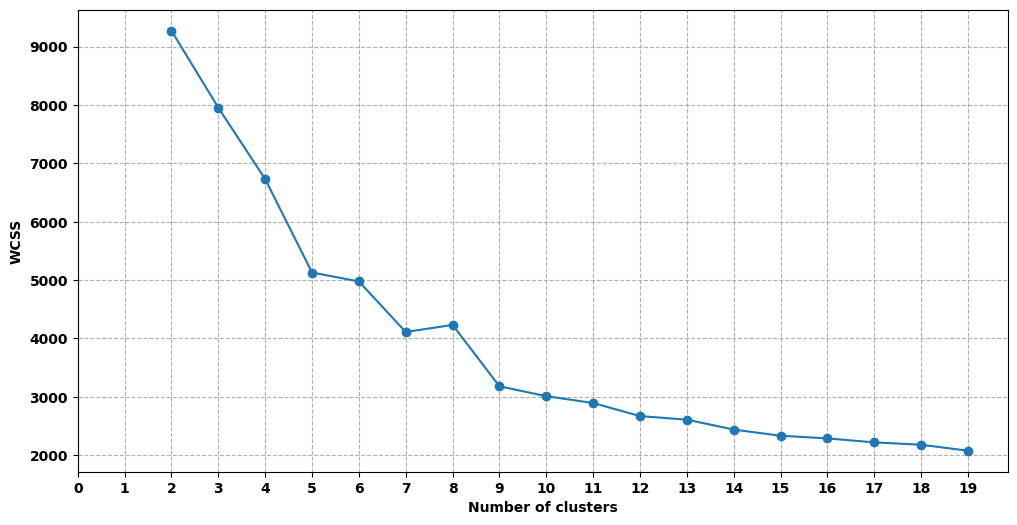

In [18]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(minmax_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette min_max**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


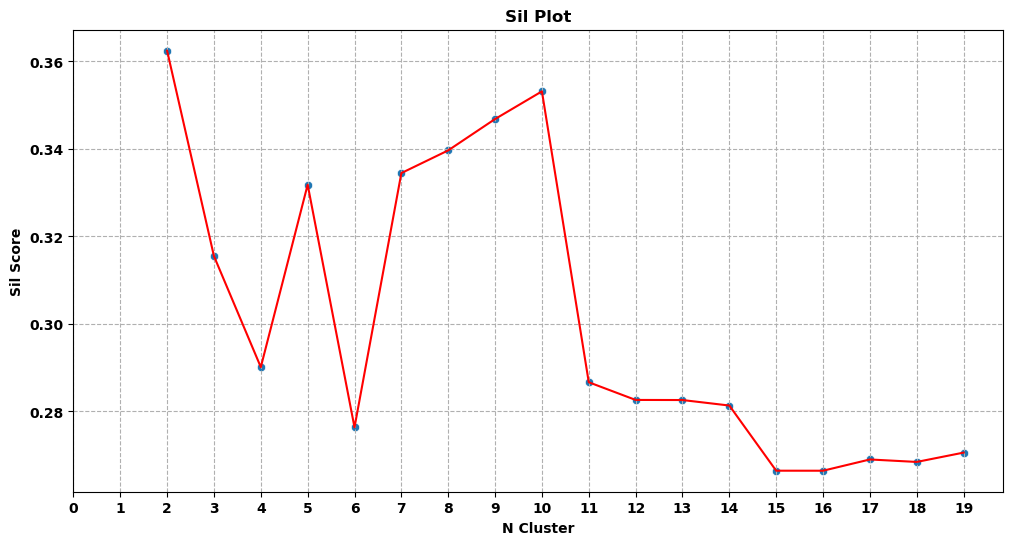

In [19]:
from sklearn.metrics import silhouette_score
df =minmax_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

**Pca min_max**

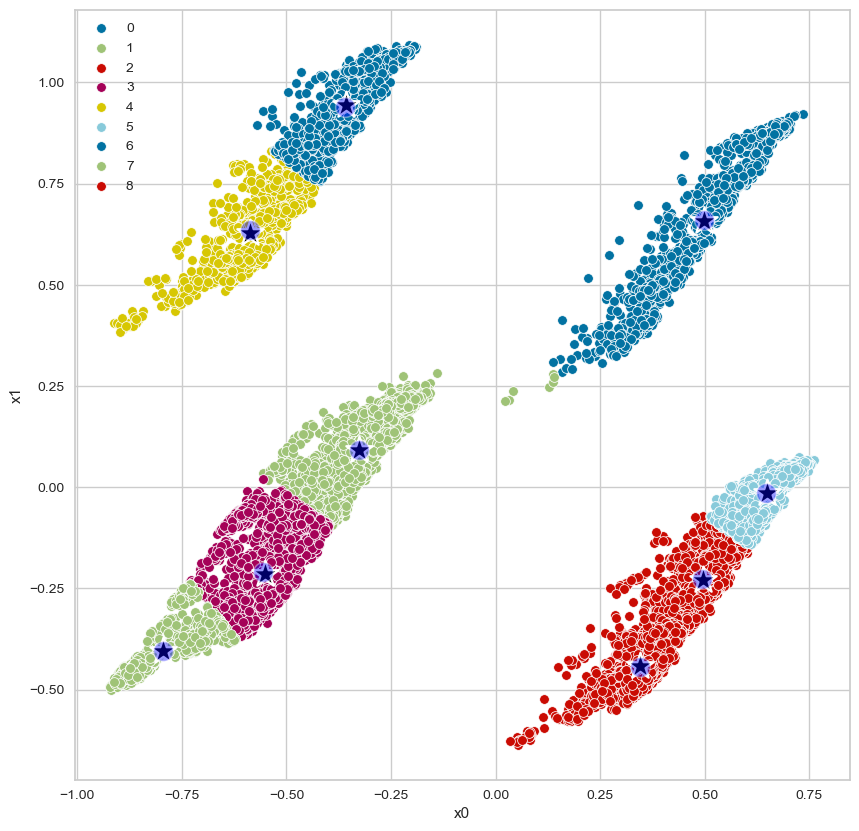

In [52]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(minmax_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 9,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**standard scaler**

In [53]:
z_scaler = StandardScaler()
z_data_scaled =z_scaler.fit_transform(total_df)
z_data_scaled = pd.DataFrame(z_data_scaled, columns = total_df.columns)


**elbow standard scaler**

within cluster sum of squared distance for k=2:  181055.60634833985
within cluster sum of squared distance for k=3:  162893.52059559806
within cluster sum of squared distance for k=4:  150100.6697192855
within cluster sum of squared distance for k=5:  137721.52732584297
within cluster sum of squared distance for k=6:  129866.5092738003
within cluster sum of squared distance for k=7:  123098.3437412533
within cluster sum of squared distance for k=8:  110583.46018564614
within cluster sum of squared distance for k=9:  108208.8320512776
within cluster sum of squared distance for k=10:  104364.21561407193
within cluster sum of squared distance for k=11:  100838.27698593501
within cluster sum of squared distance for k=12:  97831.65287957787
within cluster sum of squared distance for k=13:  93747.85978934598
within cluster sum of squared distance for k=14:  91164.8798304958
within cluster sum of squared distance for k=15:  88468.2062408325
within cluster sum of squared distance for k=16:  86

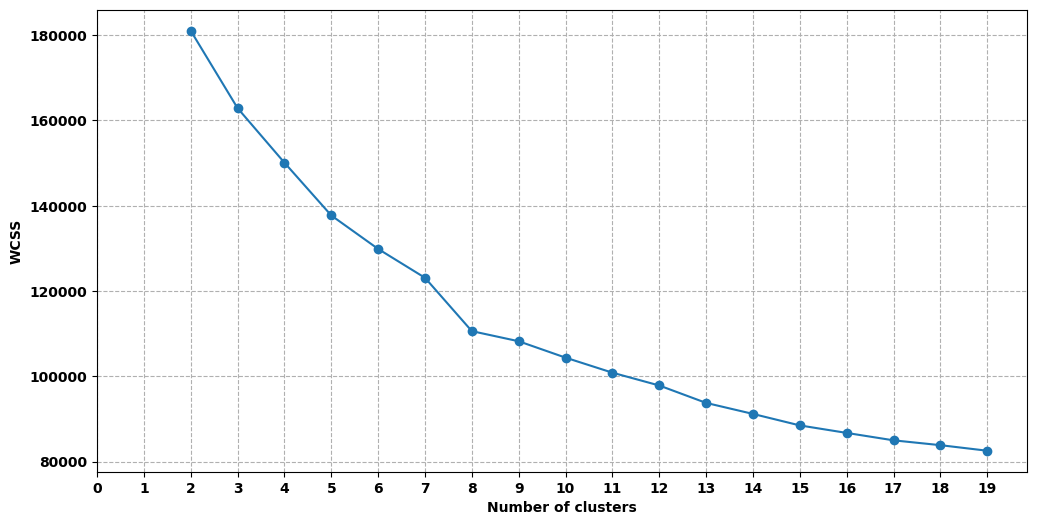

In [22]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(z_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

k=8 ro mishe ye noghte shekast darnazar gereft ama vaghean moshakhas nist kheily
<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
k=8  رو میشه یه نقطه شکست در نظر گرفت اما واقعا مشخص نیست خیلی
</p>

**Silhouette standard scaler**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


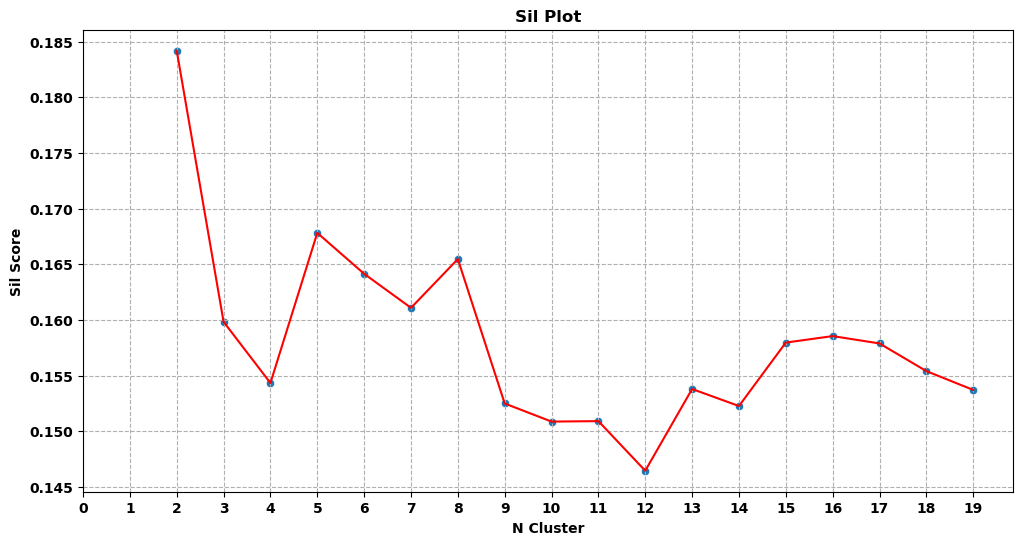

In [23]:
from sklearn.metrics import silhouette_score
df =z_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

mibinim ke natije Sil plot jaleb nist
<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
k=6  رو میشه یه نقطه شکست در نظر گرفت اما واقعا مشخص نیست خیلی
</p>

**Pca standard scaler**

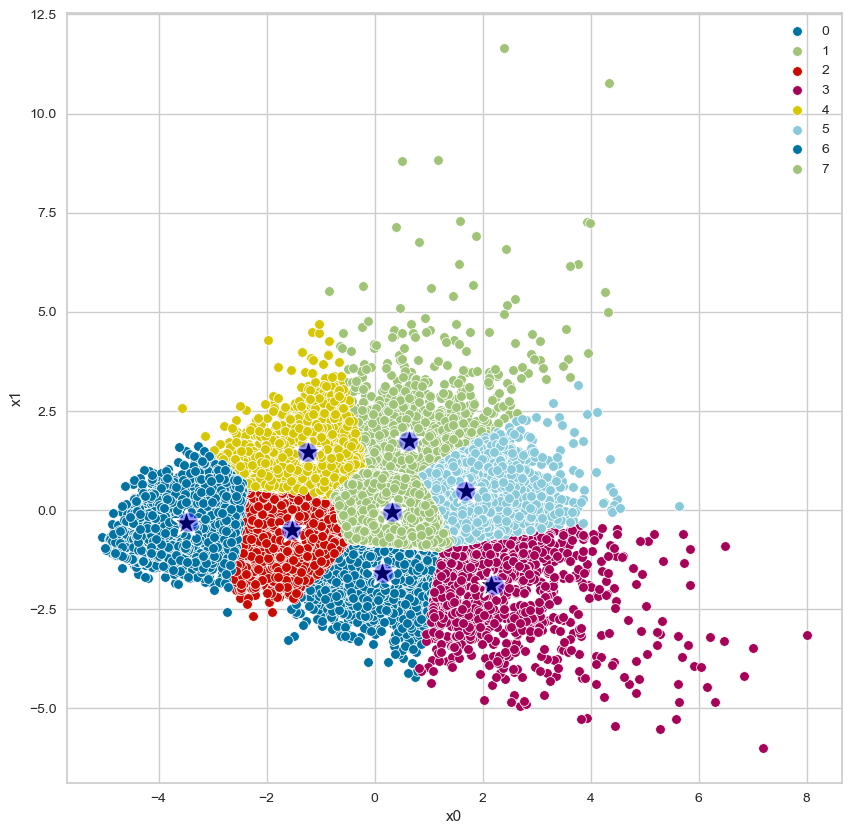

In [54]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(z_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 8,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**center standard scaler visualization**

C:\Users\theki\AppData\Local\Temp\ipykernel_10192\2583176599.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


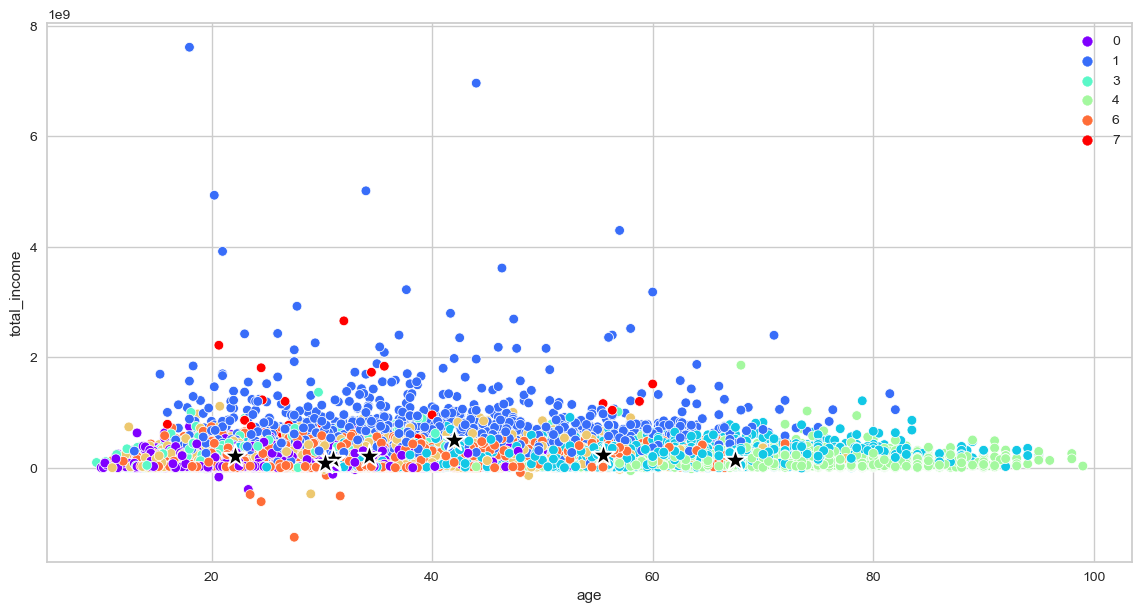

In [55]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=8,init="k-means++").fit(z_data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, z_data_scaled)


col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**center standard scaler points**

In [56]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
9046,4,2,2,42.000000,1.000000,1,0,8,1.231284e+08,504340000.0,1
12410,2,1,1,55.500000,1.000000,0,0,6,3.432300e+07,236920000.0,2
9850,6,3,3,22.166667,0.833333,0,0,6,4.689633e+07,216260000.0,3
17453,4,2,2,34.250000,0.750000,0,1,7,1.156125e+08,211840000.0,5
2226,4,2,2,31.000000,1.000000,1,0,7,7.991600e+07,161840000.0,6
3753,4,2,2,31.000000,0.750000,0,0,6,9.485500e+07,146840000.0,0
4610,2,1,1,67.500000,0.000000,0,0,5,2.351700e+07,131950000.0,4
13553,3,1,2,30.333333,1.000000,1,0,6,4.615191e+09,89760000.0,7



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
از نمودار و این خوشه ها نتیجه به این شکل نشون داده میشه
</p>

In [27]:
# data_scaled=total_df

<Axes: >

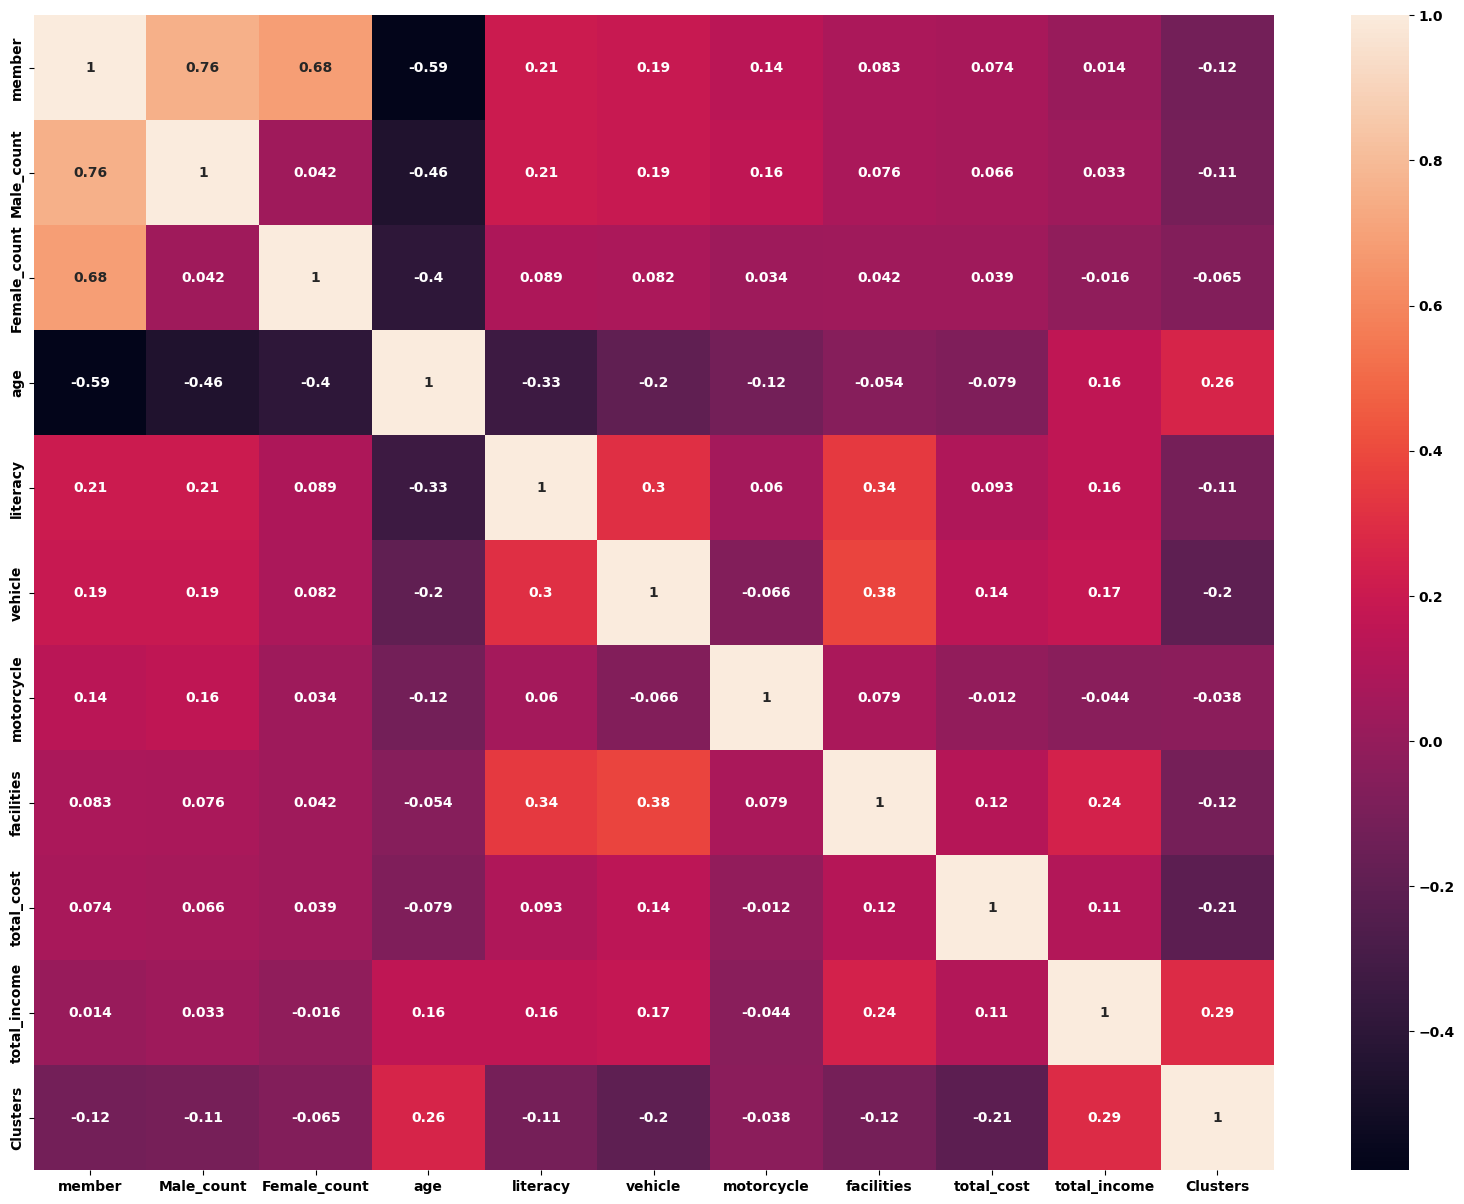

In [28]:
corr = pd.DataFrame(data_scaled).select_dtypes('number').corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هرچقدر سن افراد خانواده بیشتر باشه هزینه هاشون کمتر میشه
</p>

**min_max scaler**

<Axes: >

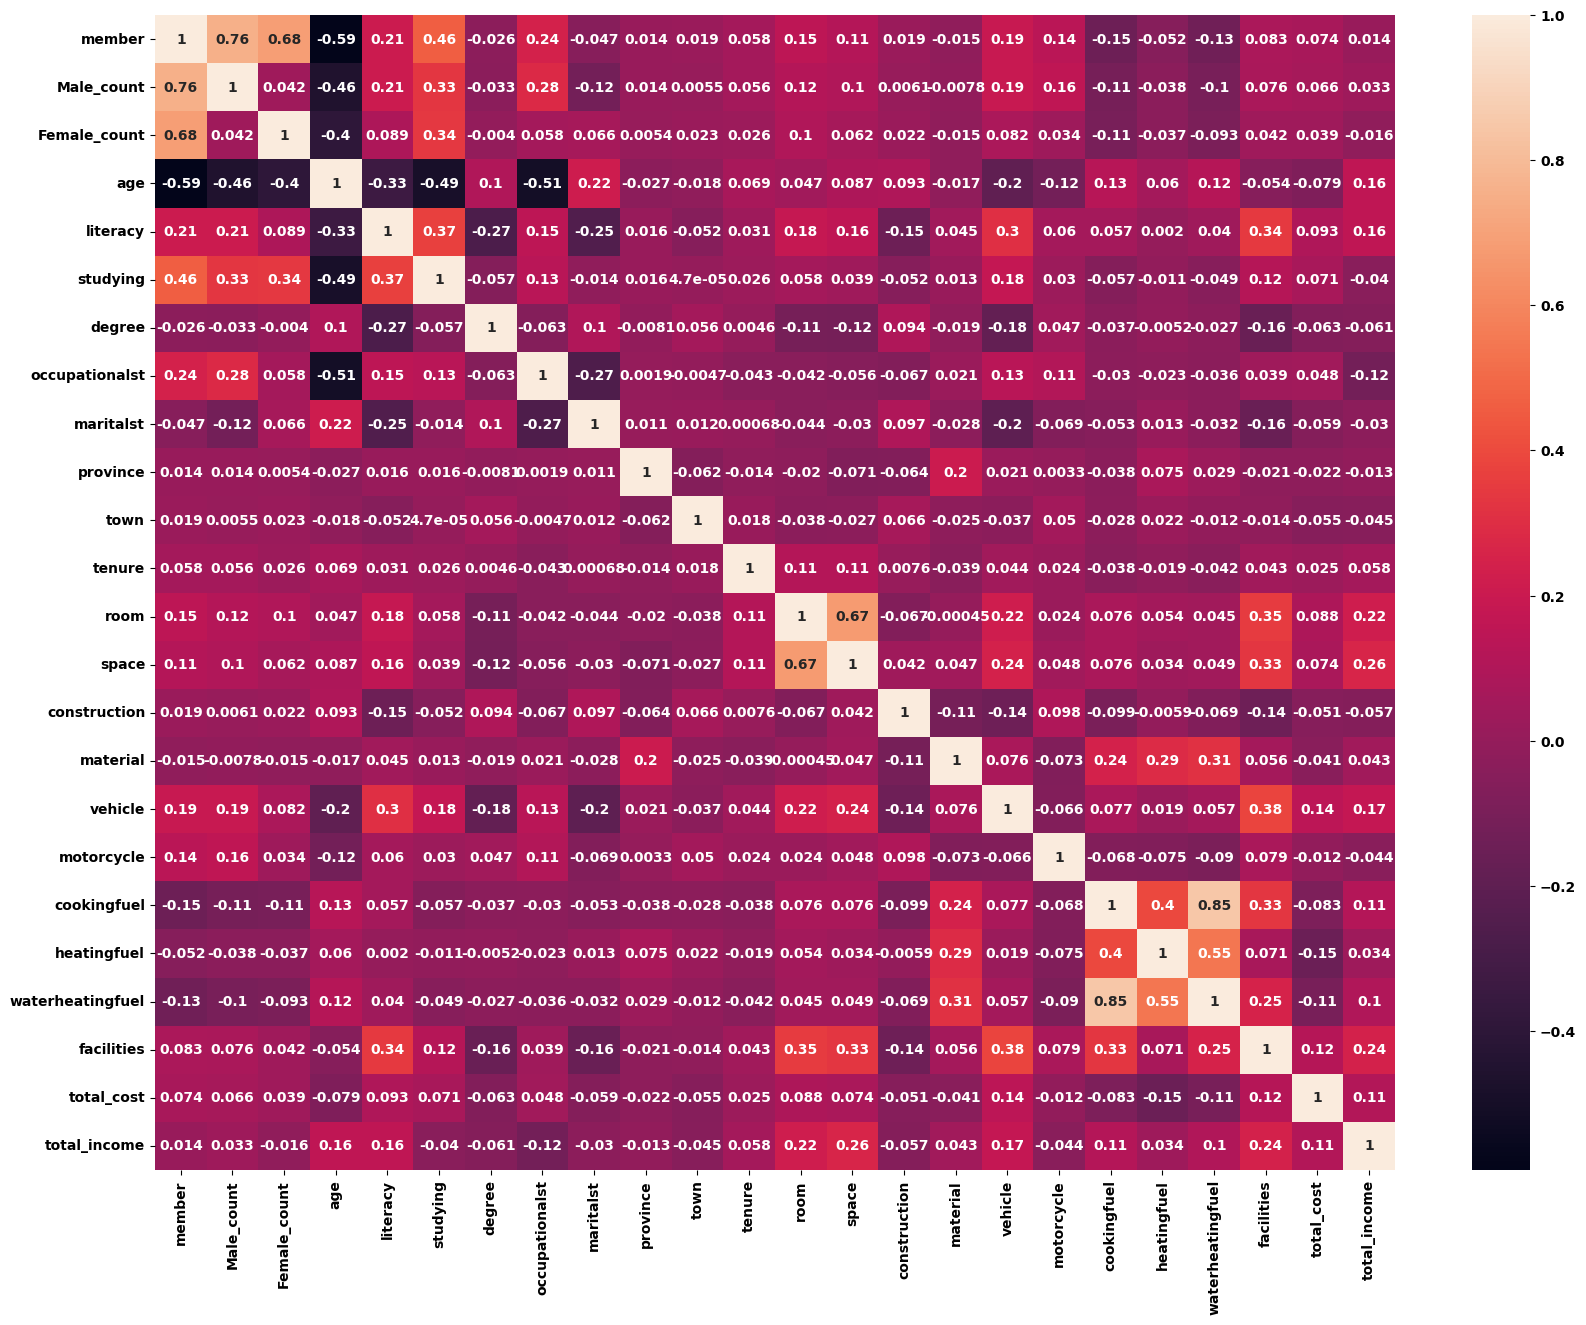

In [29]:
corr = pd.DataFrame(total_df_corr).select_dtypes('number').corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
سواد داشتن با میزان ازدواج رابطه عکس داره 0.28 منفی یعنی هر چقدر سواد بره بالا میزان ازدواج تو خانواده کمتر میشه
</p>



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هرچقدر female_count  یک خانواده بیشتر باشه تعداد اتاق های منزل هم بیشتر میشه
</p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هر چقدر وسیله نقلیه یه خونواده بیشتر باشه هزینه هاشم بیشتر میشه
</p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هرچقدر دانش آموز بیشتری داشته باشه یه خانواده امکانات منزلش هم باید بیشتر باشه
</p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هر چقدر سن بالاتر بره تو خانواده تعداد اعضای اون خانواده کمتر میشه
</p>

**Clustering after PCA**

In [30]:

# pca = PCA(2)


# df = pca.fit_transform(data_scaled)


# from sklearn.cluster import KMeans

# gmm = GaussianMixture(n_components=5)
# gmm.fit(df)
# # kmeans = KMeans(n_clusters= 6,init="k-means++")

# # label = kmeans.fit_predict(df)
# label = gmm.predict(df)

# u_labels = np.unique(label)

# # closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

# plt.subplots(figsize=(10,10))
# for i in u_labels:
#     sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
# # sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
# # sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

# plt.xlabel('x0')
# plt.ylabel('x1')
# plt.legend()
# plt.show()

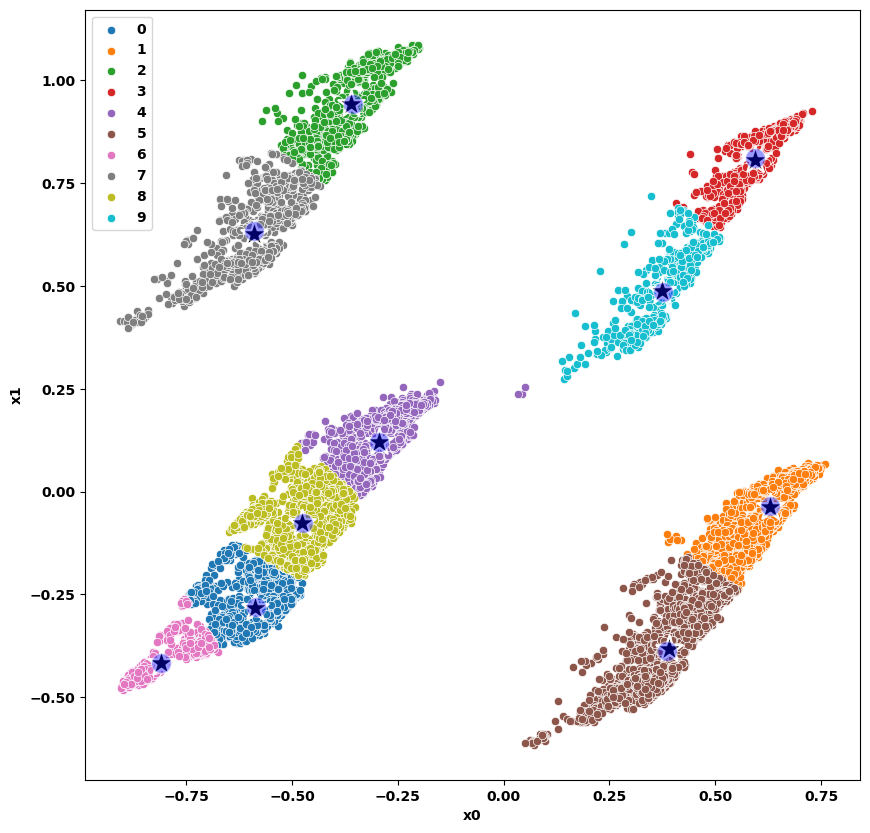

In [31]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**decision boundary visualization**

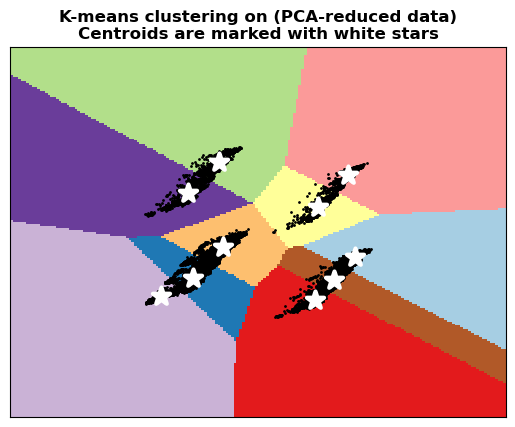

In [32]:
reduced_data = PCA(n_components=2).fit_transform(data_scaled)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='*', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on (PCA-reduced data)\n'
          'Centroids are marked with white stars')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
 

In [33]:
# total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

In [34]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=10,init="k-means++").fit(data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, data_scaled)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_10192\3833494303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([ 2489,   123,  4578,  6635, 16291,  3328,  9371,  2855,  1616,
       17969], dtype=int64)

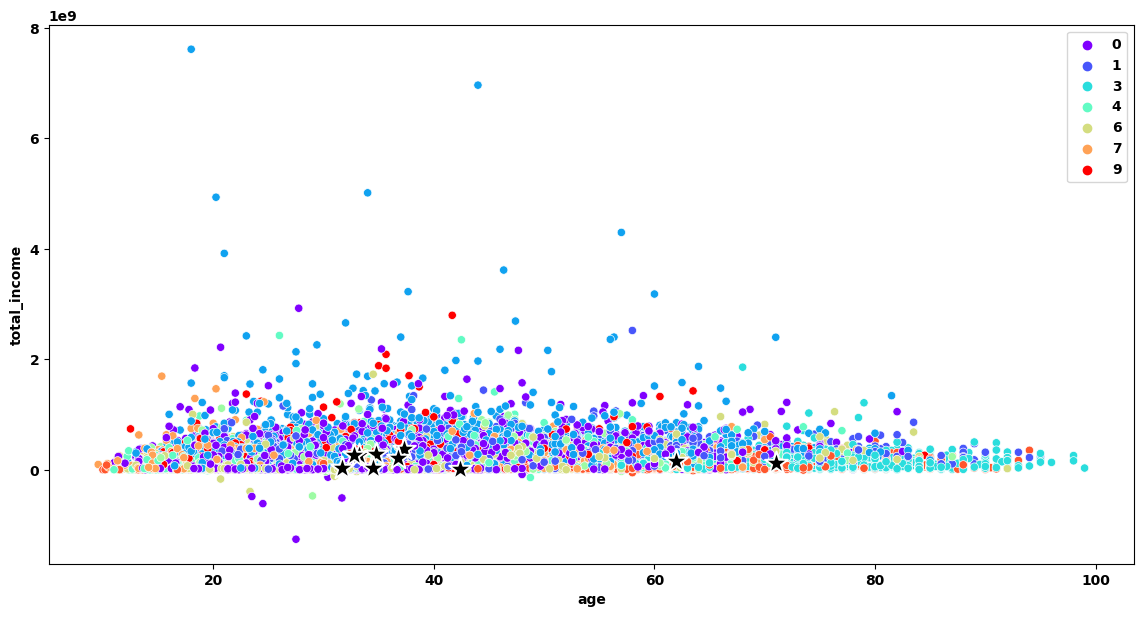

In [35]:

col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**noghate namayesh dahande marakez har cluster**

In [36]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
2489,4,2,2,37.250000,0.750000,1,0,7,131195000.0,381840000.0,0
9371,4,2,2,34.750000,0.750000,0,0,7,87691165.0,278880000.0,6
3328,4,2,2,32.750000,1.000000,1,1,8,100787995.0,270840000.0,5
16291,4,2,2,33.250000,0.750000,0,1,7,164178110.0,261840000.0,4
4578,4,2,2,36.750000,1.000000,1,0,7,470691668.0,217720000.0,2
1616,3,1,2,62.000000,0.333333,0,0,5,46748750.0,156045000.0,8
6635,2,1,1,71.000000,0.000000,0,0,5,17012000.0,116630000.0,3
17969,4,2,2,34.500000,1.000000,1,1,8,118790000.0,37090000.0,9
2855,3,1,2,31.666667,0.666667,0,0,6,96224000.0,31840000.0,7
123,3,1,2,42.333333,1.000000,0,0,6,43830164.0,20380000.0,1


**be khanevar haye 1 nafari tavajoh konid ke aghlab hodode 70 sal sen darand**

**WCSS: It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.**

within cluster sum of squared distance for k=2:  9109.825862515714
within cluster sum of squared distance for k=3:  7836.055918917908
within cluster sum of squared distance for k=4:  6023.257635582657
within cluster sum of squared distance for k=5:  5285.33556523258
within cluster sum of squared distance for k=6:  4234.591115531238
within cluster sum of squared distance for k=7:  3332.3422862735797
within cluster sum of squared distance for k=8:  3106.6475073513043
within cluster sum of squared distance for k=9:  2936.9867369003373
within cluster sum of squared distance for k=10:  2807.599378644733
within cluster sum of squared distance for k=11:  2682.222273965439
within cluster sum of squared distance for k=12:  2561.4809691233395
within cluster sum of squared distance for k=13:  2403.4489098758954
within cluster sum of squared distance for k=14:  2352.2513347537065
within cluster sum of squared distance for k=15:  2255.497416176977
within cluster sum of squared distance for k=16:  2

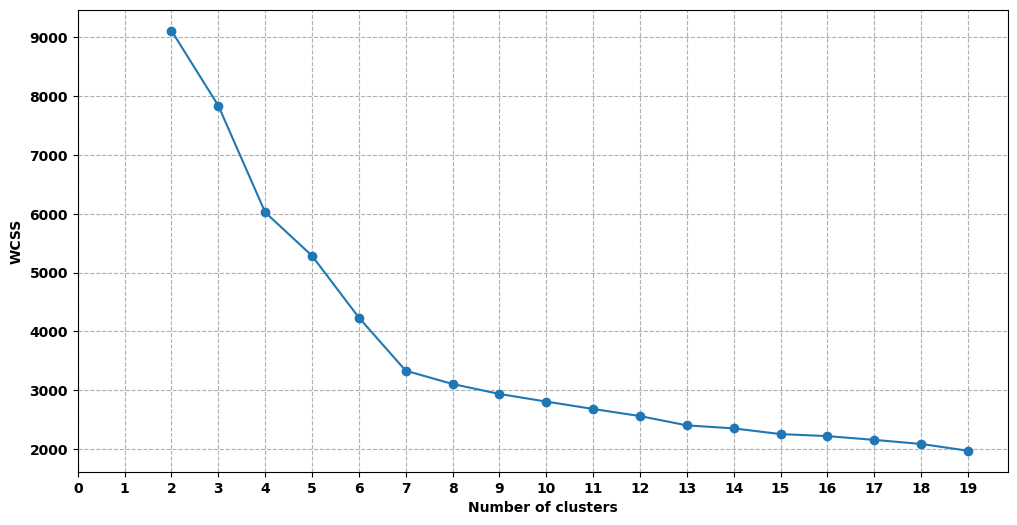

In [37]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette: The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


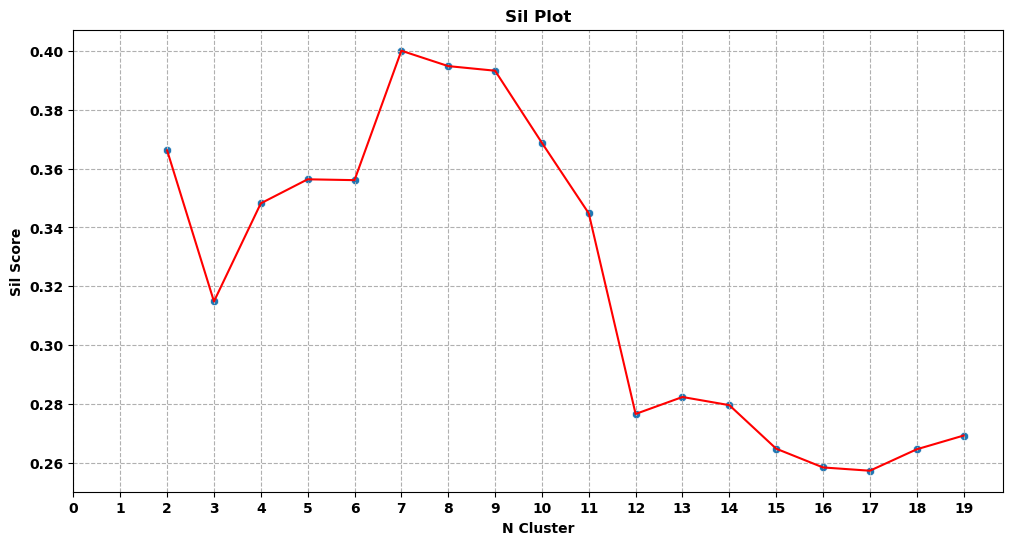

In [38]:

from sklearn.metrics import silhouette_score
df =data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

**Silhouette Visualizer**

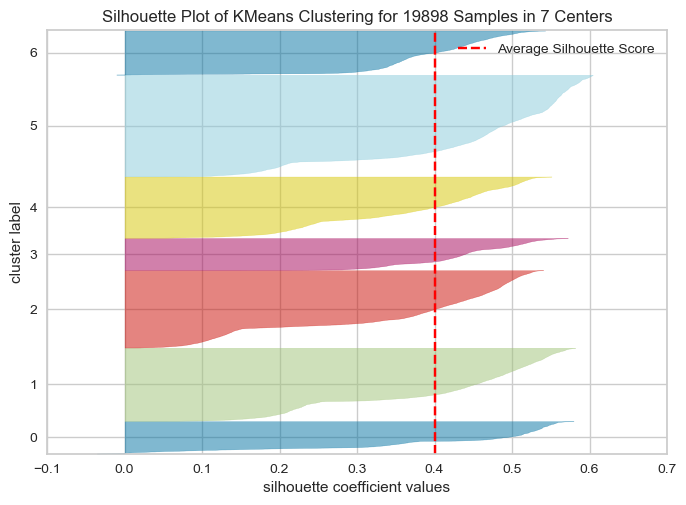

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 19898 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(7,random_state=42,init='k-means++')
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()    

<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
در این نمایش از Sil درواقع خط چین قرمز میانگین Sil میباشد که اولا هر چه این مقدار به 1 نزدیک تر باشد خوشه های بهتری داریم ثانیا سایزخوشه ها هم باید تقریبا یکسان باشد مثلا در مثال بالا اگر k=6 میشد مقدار sil  به کمتر از 0.5 کاهش میافت و سایز خوشه ها کوچک و بزرگ میشد بنابراین بهترین مقدار برای k همین 5 است.
</p>

**Decision Boundary**

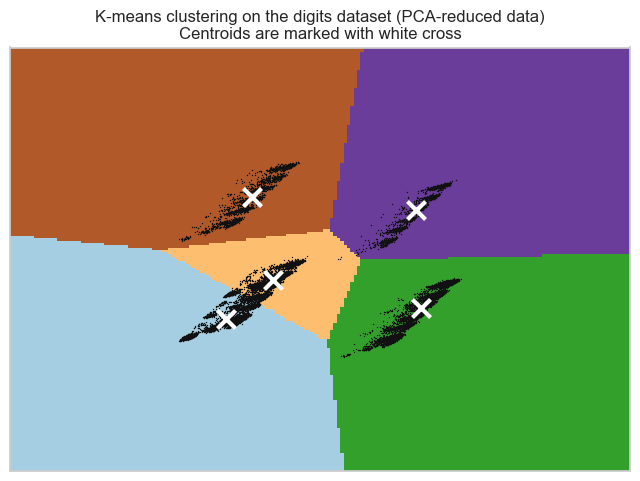

In [40]:
reduced_data = PCA(n_components=2).fit_transform(data_scaled)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [60]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=7,init="k-means++").fit(data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, data_scaled)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_10192\2426635073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([ 2489, 16291,  2588,  3712,  4578, 11960,  9371], dtype=int64)

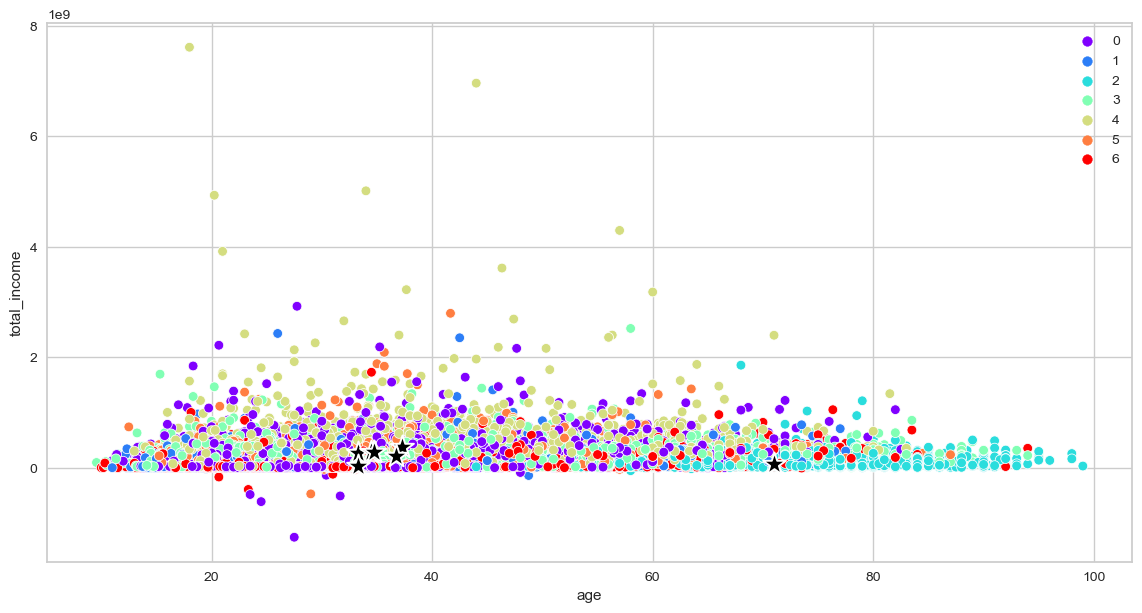

In [61]:
col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

In [62]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
2489,4,2,2,37.25,0.75,1,0,7,131195000.0,381840000.0,0
11960,4,2,2,34.50,1.00,1,1,8,280144500.0,279840000.0,5
9371,4,2,2,34.75,0.75,0,0,7,87691165.0,278880000.0,6
16291,4,2,2,33.25,0.75,0,1,7,164178110.0,261840000.0,1
4578,4,2,2,36.75,1.00,1,0,7,470691668.0,217720000.0,4
2588,2,1,1,71.00,0.00,0,0,5,133119000.0,58920000.0,2
3712,4,2,2,33.25,0.75,0,0,7,64211000.0,21840000.0,3


<b><p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
مشاهده میشه بین دو خانواده برتر از لحاظ درامدی میشه دید که داشتن موتور باعث شده هزینه خانواده خیلی بیشتر از خانواده بالایی بشه این مورد رو از امکانات خانه facilities هم میشه نتیجه گرفت که این خانواده زندگی تجملاتی داره و همین باعث شده هزینه هاش زیاد بشه
</p></b>

<b><p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
تلاش هایی برای نمایش بهتر شکست در دونمودار Sil و elbow  برای یافتن بهترین مقدار k
</p></b>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
pca اگر اسکیل داده ها نامناسب باشد کمک خاصی به بهتر شدن نمودار elbow ,Silhouette نمی کند
</p>

**pca for finding k**

In [44]:
pca = PCA(5)


df = pca.fit_transform(data_scaled)


from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

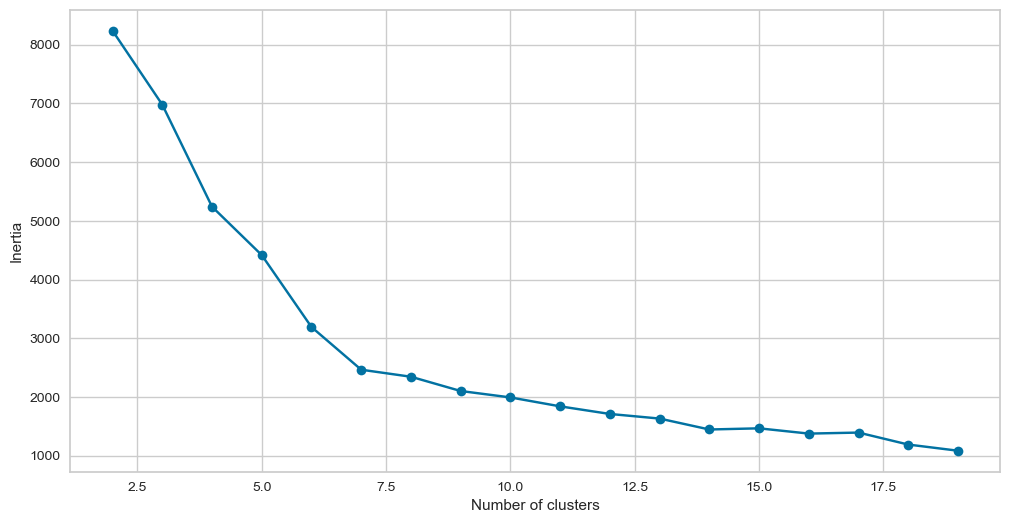

In [45]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig, ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.show()

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


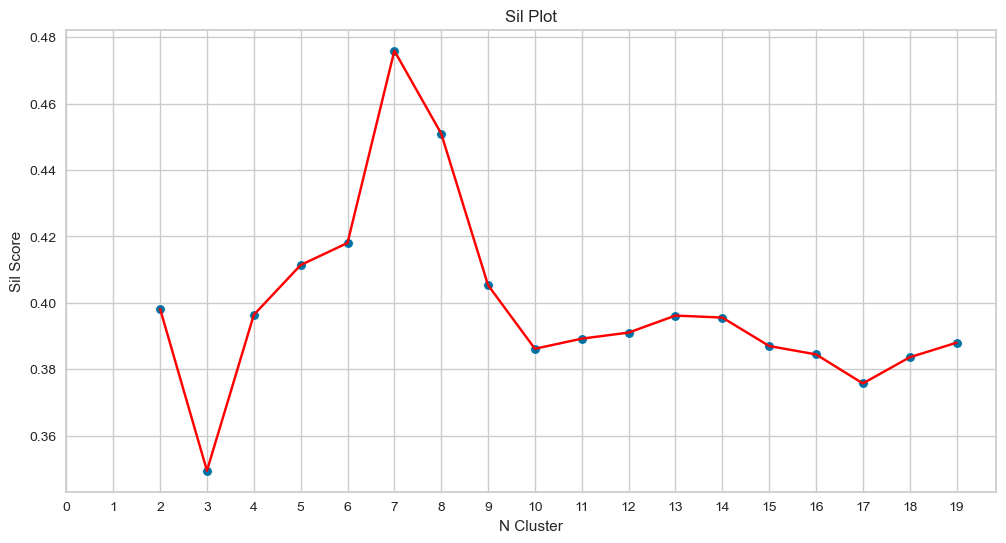

In [46]:
from sklearn.metrics import silhouette_score
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

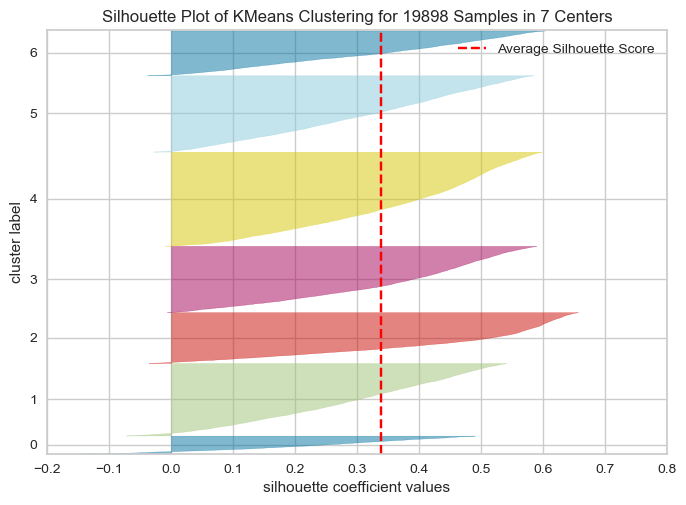

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 19898 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [68]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(7,random_state=42,init='k-means++')
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()    

In [69]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=7,init="k-means++",random_state=42).fit(df)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, df)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_10192\2585552819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([11397, 14411, 12463, 16577, 12595,  4554, 13335], dtype=int64)

In [70]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
12595,5,1,4,43.400000,1.000000,1,0,7,90085000.0,527300000.0,4
14411,4,1,3,56.000000,1.000000,1,0,8,107910000.0,381840000.0,1
13335,2,1,1,58.500000,0.500000,1,1,7,69104000.0,236920000.0,6
12463,2,0,2,70.500000,0.000000,0,0,6,30915000.0,200920000.0,2
11397,7,2,5,30.000000,0.857143,0,0,8,96763000.0,38220000.0,0
4554,3,2,1,43.333333,1.000000,0,0,7,87450900.0,16380000.0,5
16577,4,2,2,21.000000,1.000000,0,0,6,28268300.0,0.0,3


In [71]:
total_df.loc[total_df.Clusters == 5, ].age.mean()

35.486447039199334

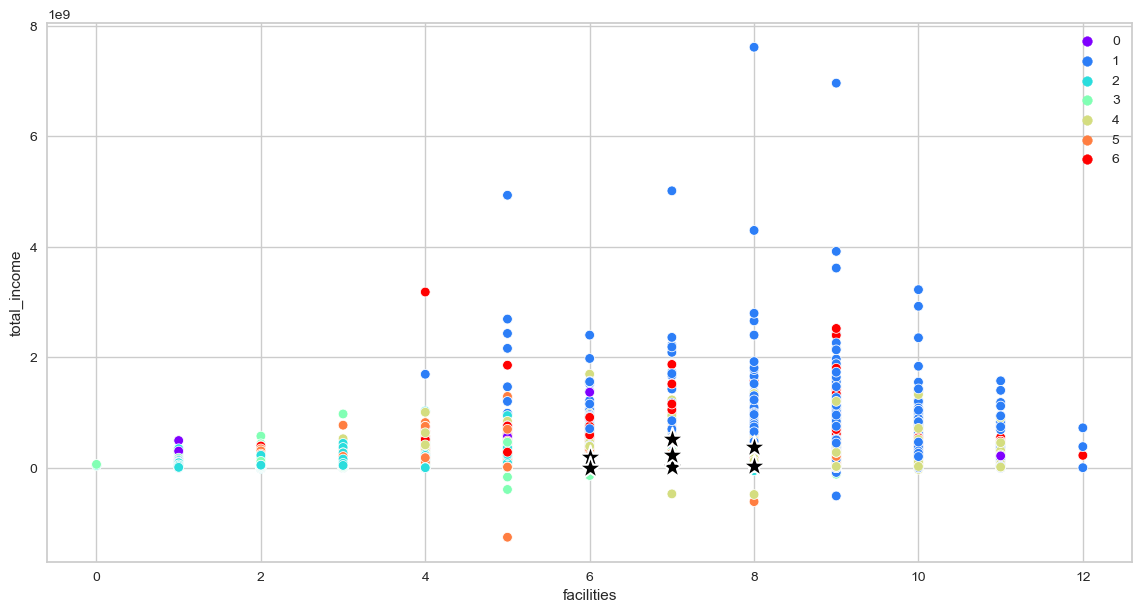

In [72]:
col0='facilities'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()